In [1]:
import pandas as pd

df = pd.read_csv('small_dataset.csv')

In [2]:
df.shape

(300000, 43)

dataset has been filtered to only include american airlines, united airline and delta airline

In [3]:
df.dtypes

Unnamed: 0              int64
ItinID                  int64
MktID                   int64
MktCoupons              int64
Year                    int64
Quarter                 int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCountry          object
OriginStateFips         int64
OriginState            object
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCountry            object
DestStateFips           int64
DestState              object
DestStateName          object
DestWac                 int64
AirportGroup           object
WacGroup               object
TkCarrierChange       float64
TkCarrierGroup         object
OpCarrierChange       float64
OpCarrierGroup         object
RPCarrier              object
TkCarrier              object
OpCarrier              object
BulkFare  

### Create subset of dataset needed for sub hypothesis

In [4]:
df.columns

Index(['Unnamed: 0', 'ItinID', 'MktID', 'MktCoupons', 'Year', 'Quarter',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCountry', 'OriginStateFips', 'OriginState', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCountry', 'DestStateFips', 'DestState', 'DestStateName',
       'DestWac', 'AirportGroup', 'WacGroup', 'TkCarrierChange',
       'TkCarrierGroup', 'OpCarrierChange', 'OpCarrierGroup', 'RPCarrier',
       'TkCarrier', 'OpCarrier', 'BulkFare', 'Passengers', 'MktFare',
       'MktDistance', 'MktDistanceGroup', 'MktMilesFlown', 'NonStopMiles',
       'ItinGeoType', 'MktGeoType', 'Unnamed: 41'],
      dtype='object')

In [5]:
df = df[['ItinID','Year',
'Quarter',
'AirportGroup',
'TkCarrier',
'OriginAirportID',
'OriginState',
'DestAirportID',
'DestState',
'MktFare',
'MktMilesFlown' 
]]
df.head(15)

,ItinID,Year,Quarter,AirportGroup,TkCarrier,OriginAirportID,OriginState,DestAirportID,DestState,MktFare,MktMilesFlown
0,201722232262,2017,2,ORD:DTW:ALB,DL,13930,IL,10257,NY,387.00,724.0
1,201725343034,2017,2,EWR:XNA,UA,11618,NJ,15919,AR,138.00,1131.0
2,201722578850,2017,2,IAH:BTR,UA,12266,TX,10781,LA,352.50,253.0
3,201732127204,2017,3,MSP:CVG,DL,13487,MN,11193,KY,229.50,596.0
4,201721037862,2017,2,FLL:CLT:SMF,AA,11697,FL,14893,CA,332.34,2876.0
5,201721538677,2017,2,ANC:MSP:IAD,DL,10299,AK,12264,VA,615.00,3427.0
6,20174976416,2017,4,SFO:CLT:BDL,AA,14771,CA,10529,CT,148.50,2940.0
7,20171570,2017,1,ATL:DSM,DL,10397,GA,11423,IA,289.00,743.0
8,20173413699,2017,3,FLL:DFW:ONT,AA,11697,FL,13891,CA,189.00,2307.0
9,2017251902,2017,2,JFK:BUF,DL,12478,NY,10792,NY,70.00,301.0


### Split airport group - find out count of stops for each flight

In [6]:
df['AirportGroup'] = df['AirportGroup'].str.split(pat=":")

In [7]:
df['stops'] = ''
df['stops'] = df['AirportGroup'].apply(lambda x: len(x))

In [8]:
df.head()

,ItinID,Year,Quarter,AirportGroup,TkCarrier,OriginAirportID,OriginState,DestAirportID,DestState,MktFare,MktMilesFlown,stops
0,201722232262,2017,2,"[ORD, DTW, ALB]",DL,13930,IL,10257,NY,387.00,724.0,3
1,201725343034,2017,2,"[EWR, XNA]",UA,11618,NJ,15919,AR,138.00,1131.0,2
2,201722578850,2017,2,"[IAH, BTR]",UA,12266,TX,10781,LA,352.50,253.0,2
3,201732127204,2017,3,"[MSP, CVG]",DL,13487,MN,11193,KY,229.50,596.0,2
4,201721037862,2017,2,"[FLL, CLT, SMF]",AA,11697,FL,14893,CA,332.34,2876.0,3


2 stops indicate a non-stop flight

### Merge - join full airline name table 

In [9]:
carriers = pd.read_csv('L_CARRIERS.csv')
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
carriers.rename(columns={'Code': 'TkCarrier', 'Description': 'AirlineName'}, inplace=True)
carriers.head()

,TkCarrier,AirlineName
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [11]:
df = pd.merge(df, carriers, how='inner', on='TkCarrier')
df.columns

Index(['ItinID', 'Year', 'Quarter', 'AirportGroup', 'TkCarrier',
       'OriginAirportID', 'OriginState', 'DestAirportID', 'DestState',
       'MktFare', 'MktMilesFlown', 'stops', 'AirlineName'],
      dtype='object')

In [12]:
df.AirlineName.value_counts()

American Airlines Inc.    110813
Delta Air Lines Inc.      109717
United Air Lines Inc.      79470
Name: AirlineName, dtype: int64

In [13]:
df.head()

,ItinID,Year,Quarter,AirportGroup,TkCarrier,OriginAirportID,OriginState,DestAirportID,DestState,MktFare,MktMilesFlown,stops,AirlineName
0,201722232262,2017,2,"[ORD, DTW, ALB]",DL,13930,IL,10257,NY,387.0,724.0,3,Delta Air Lines Inc.
1,201732127204,2017,3,"[MSP, CVG]",DL,13487,MN,11193,KY,229.5,596.0,2,Delta Air Lines Inc.
2,201721538677,2017,2,"[ANC, MSP, IAD]",DL,10299,AK,12264,VA,615.0,3427.0,3,Delta Air Lines Inc.
3,20171570,2017,1,"[ATL, DSM]",DL,10397,GA,11423,IA,289.0,743.0,2,Delta Air Lines Inc.
4,2017251902,2017,2,"[JFK, BUF]",DL,12478,NY,10792,NY,70.0,301.0,2,Delta Air Lines Inc.


In [14]:
df.shape

(300000, 13)

In [15]:
df.dtypes

ItinID               int64
Year                 int64
Quarter              int64
AirportGroup        object
TkCarrier           object
OriginAirportID      int64
OriginState         object
DestAirportID        int64
DestState           object
MktFare            float64
MktMilesFlown      float64
stops                int64
AirlineName         object
dtype: object

### merge holiday count for every quarter

In [16]:
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')
holidays.columns

Index(['Date', 'Holiday', 'WeekDay', 'Month', 'Day', 'Year'], dtype='object')

In [17]:
yearlist = [2017, 2018, 2019]
yholidays = holidays[holidays['Year'].isin(yearlist)]
yholidays.Year.value_counts()

2017    19
2018    19
2019    19
Name: Year, dtype: int64

In [18]:
yholidays['Quarter'] = ''
            
def quarter_new(qq):
    if qq <4:
        return 1
    elif qq>4 and qq<7:
        return 2
    elif qq>7 and qq<10:
        return 3
    else:
        return 4

yholidays['Quarter'] = yholidays['Month'].apply(quarter_new)

C:\Users\zowie\AppData\Local\Temp\ipykernel_2164\3125471298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yholidays['Quarter'] = ''
C:\Users\zowie\AppData\Local\Temp\ipykernel_2164\3125471298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yholidays['Quarter'] = yholidays['Month'].apply(quarter_new)


In [19]:
grouped = yholidays[['Year', 'Quarter', 'Holiday']].groupby(['Year', 'Quarter']).count()

In [20]:
grouped.head()

Holiday
Year Quarter         
2017 1              4
     2              2
     3              3
     4             10
2018 1              4

In [21]:
df = df.merge(grouped, on=['Year', 'Quarter'], how='left')

In [22]:
df.head()

,ItinID,Year,Quarter,AirportGroup,TkCarrier,OriginAirportID,OriginState,DestAirportID,DestState,MktFare,MktMilesFlown,stops,AirlineName,Holiday
0,201722232262,2017,2,"[ORD, DTW, ALB]",DL,13930,IL,10257,NY,387.0,724.0,3,Delta Air Lines Inc.,2
1,201732127204,2017,3,"[MSP, CVG]",DL,13487,MN,11193,KY,229.5,596.0,2,Delta Air Lines Inc.,3
2,201721538677,2017,2,"[ANC, MSP, IAD]",DL,10299,AK,12264,VA,615.0,3427.0,3,Delta Air Lines Inc.,2
3,20171570,2017,1,"[ATL, DSM]",DL,10397,GA,11423,IA,289.0,743.0,2,Delta Air Lines Inc.,4
4,2017251902,2017,2,"[JFK, BUF]",DL,12478,NY,10792,NY,70.0,301.0,2,Delta Air Lines Inc.,2


## Exploratory data analysis

In [23]:
df.columns

Index(['ItinID', 'Year', 'Quarter', 'AirportGroup', 'TkCarrier',
       'OriginAirportID', 'OriginState', 'DestAirportID', 'DestState',
       'MktFare', 'MktMilesFlown', 'stops', 'AirlineName', 'Holiday'],
      dtype='object')

In [24]:
df.isna().sum()

ItinID             0
Year               0
Quarter            0
AirportGroup       0
TkCarrier          0
OriginAirportID    0
OriginState        0
DestAirportID      0
DestState          0
MktFare            0
MktMilesFlown      0
stops              0
AirlineName        0
Holiday            0
dtype: int64

In [25]:
df['FarePerMile'] = df['MktFare']/df['MktMilesFlown']
df.head()

,ItinID,Year,Quarter,AirportGroup,TkCarrier,OriginAirportID,OriginState,DestAirportID,DestState,MktFare,MktMilesFlown,stops,AirlineName,Holiday,FarePerMile
0,201722232262,2017,2,"[ORD, DTW, ALB]",DL,13930,IL,10257,NY,387.0,724.0,3,Delta Air Lines Inc.,2,0.534530
1,201732127204,2017,3,"[MSP, CVG]",DL,13487,MN,11193,KY,229.5,596.0,2,Delta Air Lines Inc.,3,0.385067
2,201721538677,2017,2,"[ANC, MSP, IAD]",DL,10299,AK,12264,VA,615.0,3427.0,3,Delta Air Lines Inc.,2,0.179457
3,20171570,2017,1,"[ATL, DSM]",DL,10397,GA,11423,IA,289.0,743.0,2,Delta Air Lines Inc.,4,0.388964
4,2017251902,2017,2,"[JFK, BUF]",DL,12478,NY,10792,NY,70.0,301.0,2,Delta Air Lines Inc.,2,0.232558


In [26]:
df.describe()

,ItinID,Year,Quarter,OriginAirportID,DestAirportID,MktFare,MktMilesFlown,stops,Holiday,FarePerMile
count,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.585999e+11,2018.000000,2.552310,12784.744083,12787.695963,276.718418,1328.465613,2.578223,4.818500,0.287718
std,7.810567e+10,0.816498,1.108675,1531.567733,1532.589686,214.157455,848.824632,0.556994,3.183832,0.335062
min,2.017267e+06,2017.000000,1.000000,10135.000000,10135.000000,0.000000,56.000000,2.000000,2.000000,0.000000
25%,2.017120e+11,2017.000000,2.000000,11298.000000,11298.000000,166.500000,708.000000,2.000000,2.000000,0.129269
50%,2.018120e+11,2018.000000,3.000000,12892.000000,12892.000000,239.000000,1107.000000,3.000000,3.000000,0.213043
75%,2.019118e+11,2019.000000,4.000000,14107.000000,14107.000000,341.122500,1824.000000,3.000000,10.000000,0.354192
max,2.019459e+11,2019.000000,4.000000,16869.000000,16869.000000,14040.000000,11339.000000,7.000000,10.000000,46.644518


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df.AirlineName.value_counts()

American Airlines Inc.    110813
Delta Air Lines Inc.      109717
United Air Lines Inc.      79470
Name: AirlineName, dtype: int64

<Axes: xlabel='AirlineName', ylabel='count'>

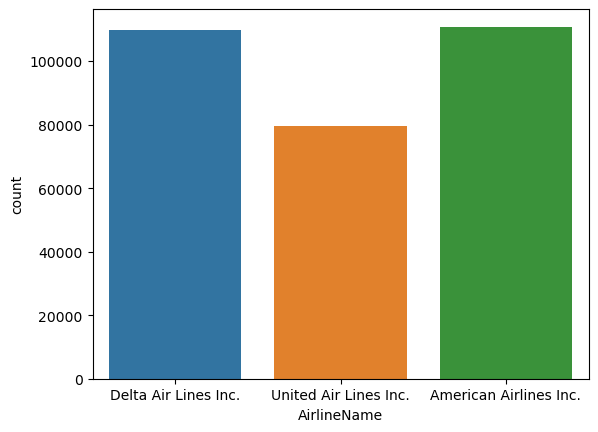

In [29]:
sns.countplot(data=df, x='AirlineName')

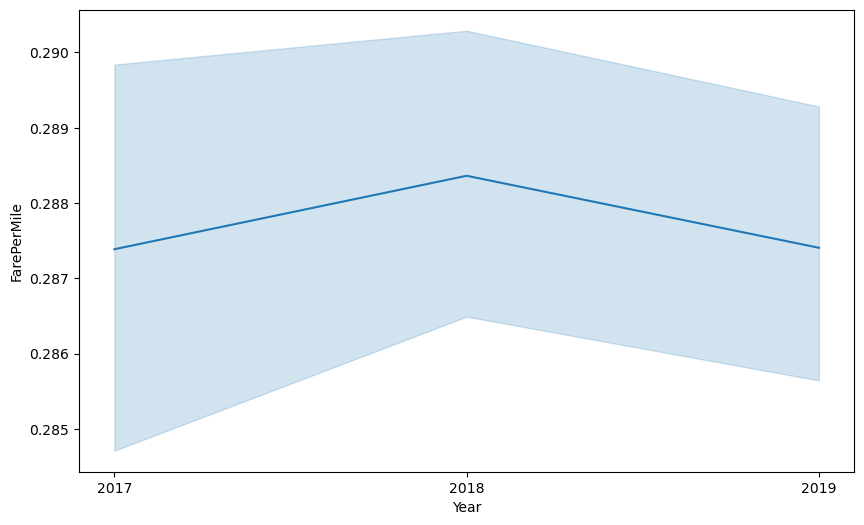

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='FarePerMile')
ax.set_xticks([2017, 2018, 2019],[2017, 2018, 2019])
plt.show()

<Axes: xlabel='FarePerMile', ylabel='Count'>

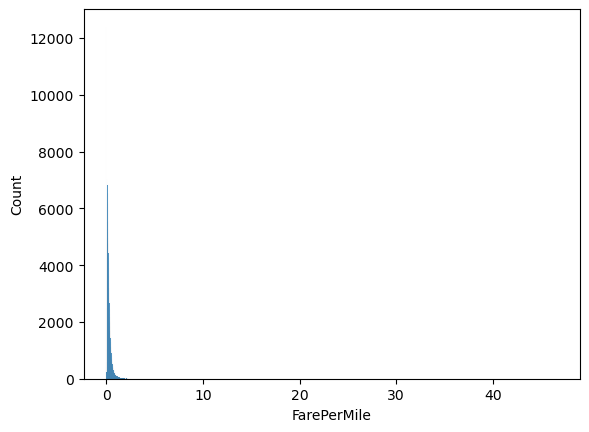

In [31]:
sns.histplot(x = df["FarePerMile"])

<Axes: xlabel='FarePerMile', ylabel='Count'>

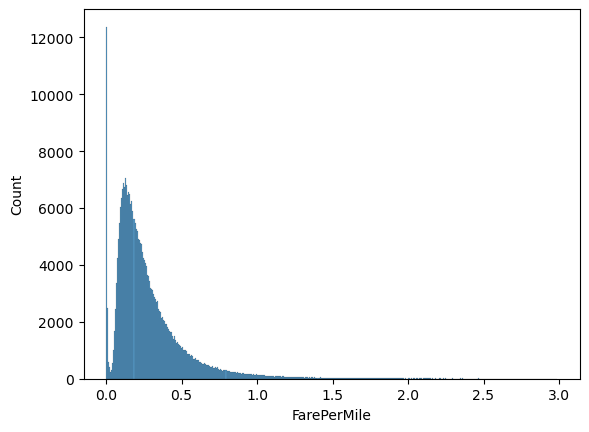

In [32]:
sns.histplot(x = df[df["FarePerMile"]<3]["FarePerMile"])

<Axes: xlabel='FarePerMile', ylabel='AirlineName'>

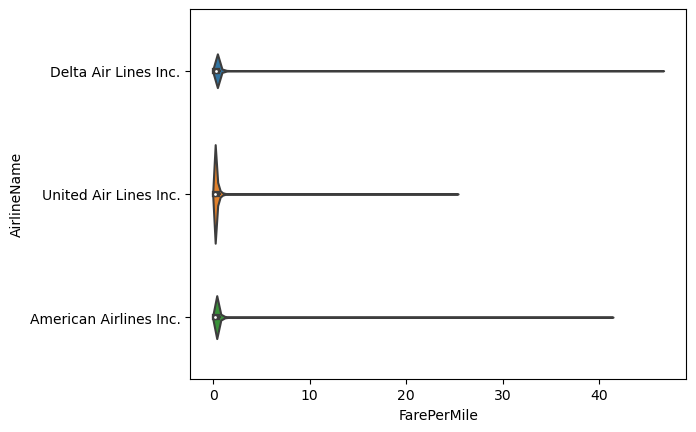

In [33]:
sns.violinplot(data=df, x='FarePerMile', y='AirlineName')

In [34]:
df.Quarter.value_counts()

4    79335
2    77744
3    74972
1    67949
Name: Quarter, dtype: int64

<Axes: xlabel='Quarter', ylabel='count'>

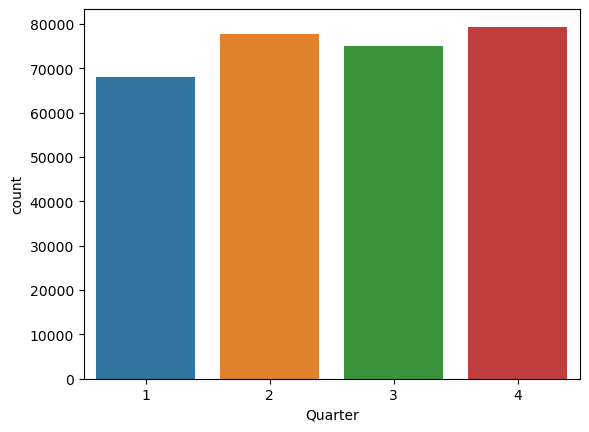

In [35]:
sns.countplot(data=df, x='Quarter')

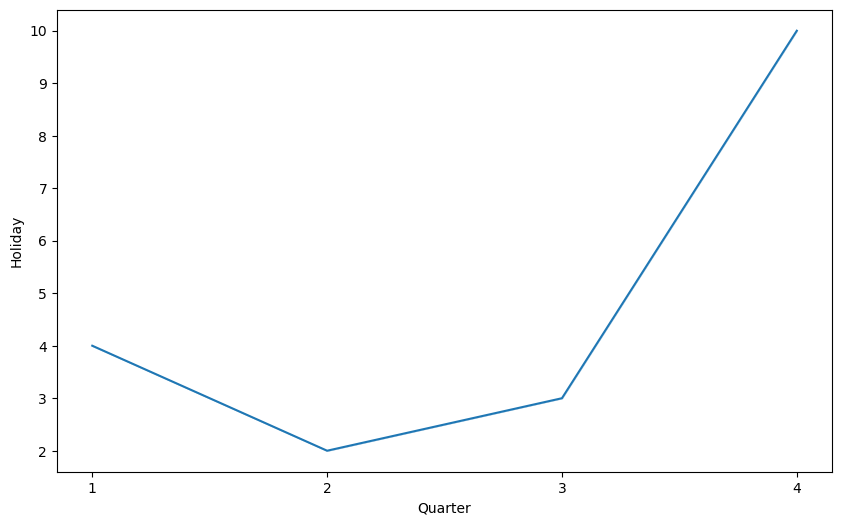

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Quarter', y='Holiday')
ax.set_xticks([1, 2, 3, 4],[1, 2, 3, 4])
plt.show()

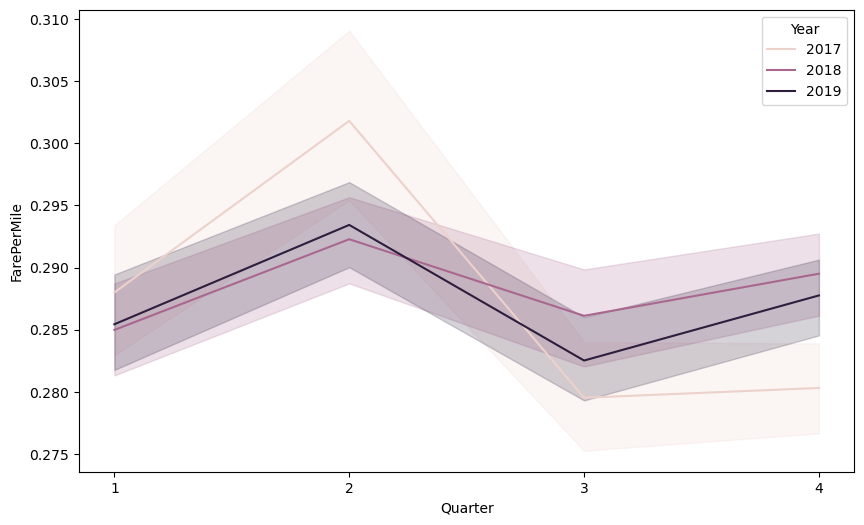

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Quarter', y='FarePerMile', hue='Year')
ax.set_xticks([1, 2, 3, 4],[1, 2, 3, 4])
plt.show()

2017 has the biggest fluctuations, while 2018 and 2019 showed similar difference in quarters

Overall, quarter 2 has the highest fare per mile. This could be caused by high demand of tickets but low number of public holidays as seen in the previous charts.


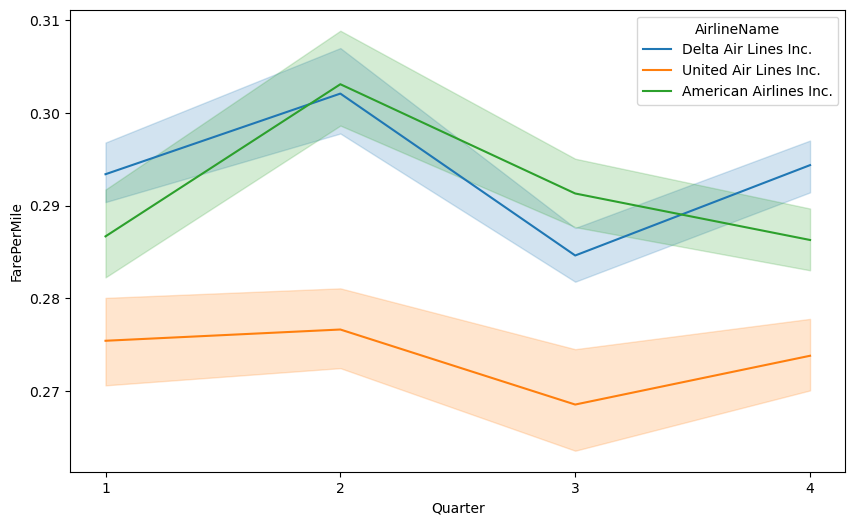

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Quarter', y='FarePerMile', hue='AirlineName')
ax.set_xticks([1, 2, 3, 4],[1, 2, 3, 4])
plt.show()

- American airlines follow the general trend, where quarter 2 has the highest fare per mile. 
- However, even though United airlines has the highest fare per mile in quarter 2 as well, they prefer to maintain a low fare per mile throughout the whole year.
- In contrast, Delta airlines has the highest fare per mile in quarter 4, 1 and 2, but has a significant drop in quarter 3 where they price match to the other airlines.

<Axes: xlabel='MktMilesFlown', ylabel='FarePerMile'>

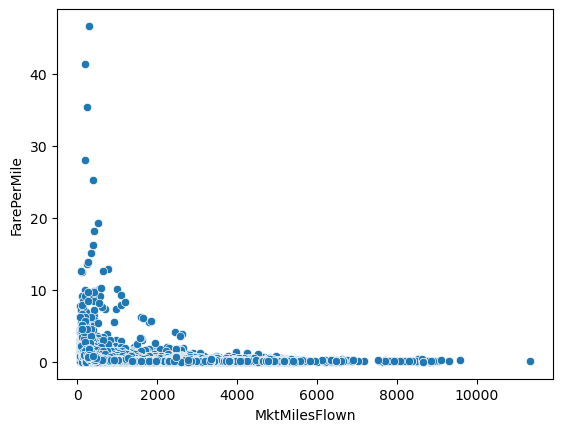

In [39]:
sns.scatterplot(data=df, x='MktMilesFlown', y='FarePerMile')

Miles flown does not have a strong correlation with fare per mile, and it is evident that there are a large number of outliers in fare per mile that have low miles flown.


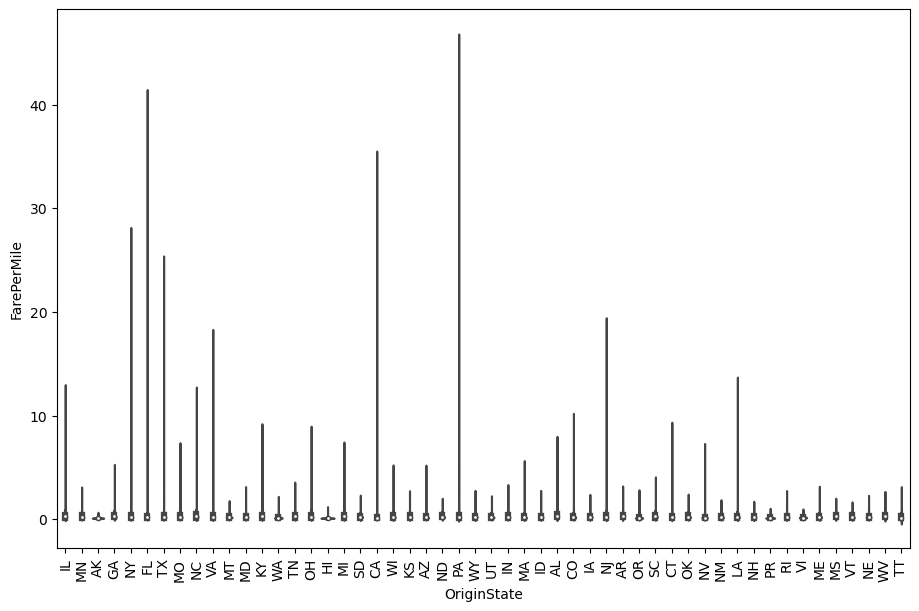

In [40]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.violinplot(data=df, x='OriginState', y='FarePerMile')
plt.xticks(rotation=90)
plt.show()

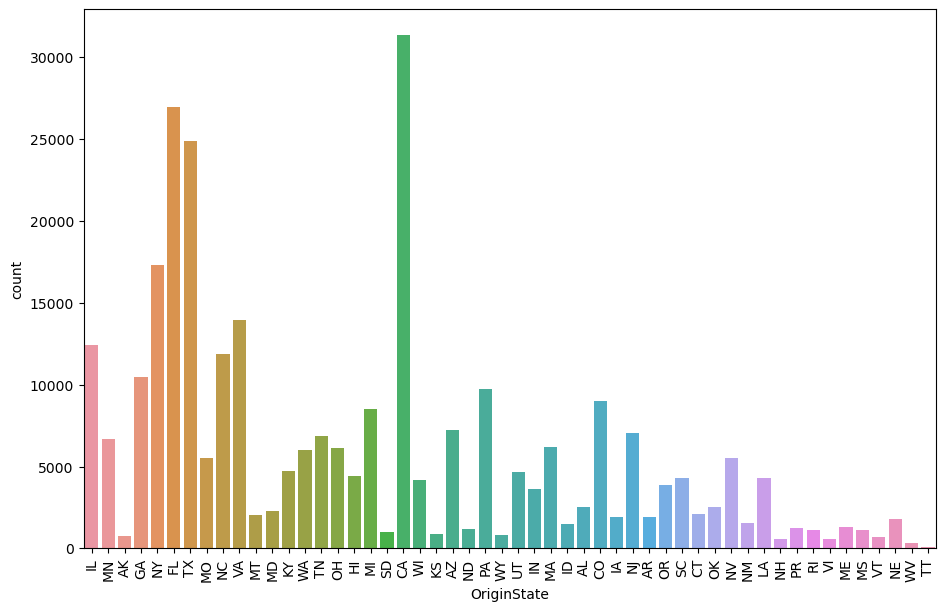

In [41]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.countplot(data=df, x='OriginState')
plt.xticks(rotation=90)
plt.show()

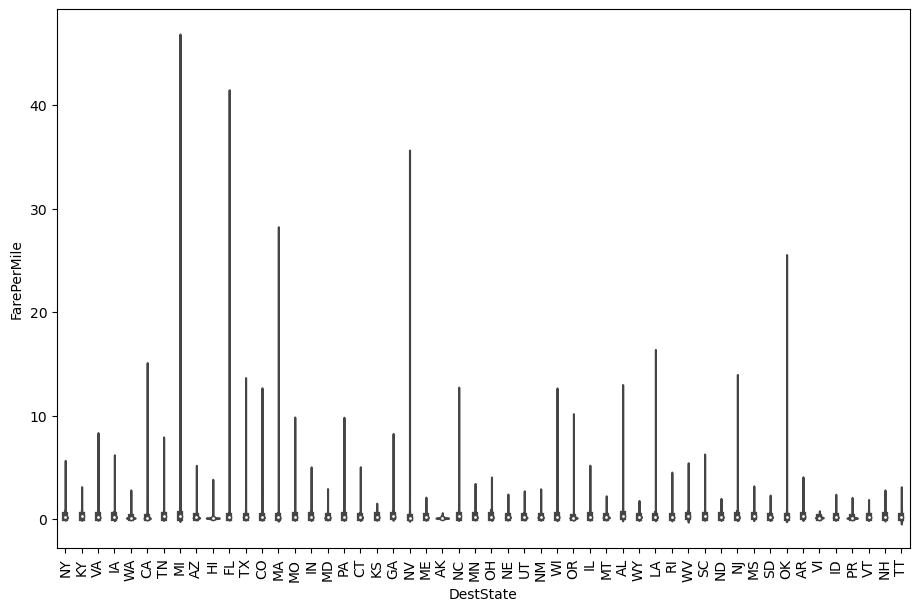

In [42]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.violinplot(data=df, x='DestState', y='FarePerMile')
plt.xticks(rotation=90)
plt.show()

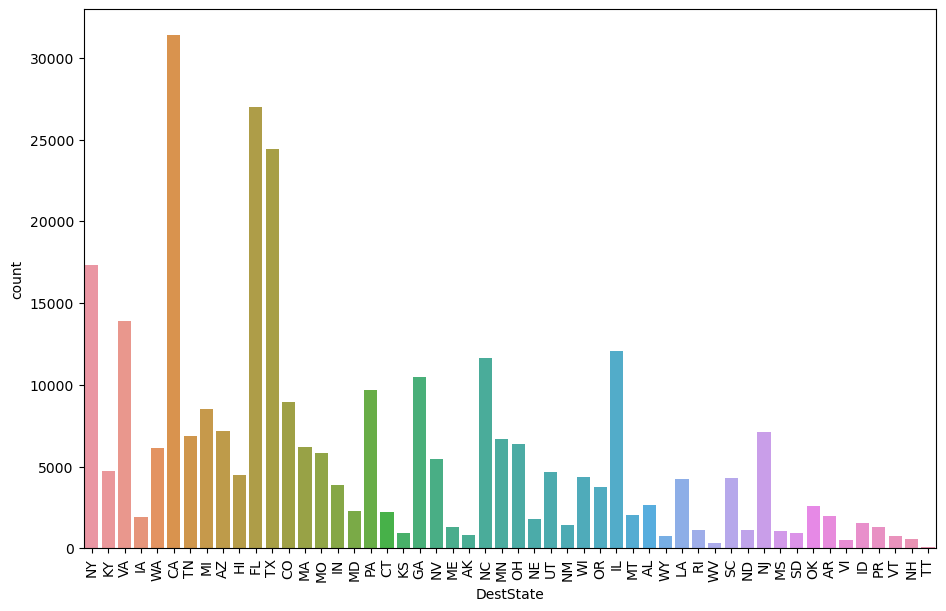

In [43]:
# sns.countplot(data=df, x='DestState', hue='AirlineName')
fig, ax = plt.subplots(figsize=(11, 7))
sns.countplot(data=df, x='DestState')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='MktMilesFlown', ylabel='AirlineName'>

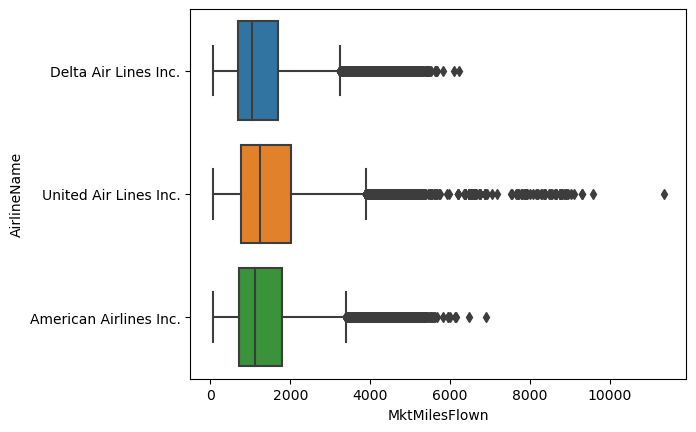

In [44]:
sns.boxplot(data=df, x='MktMilesFlown', y='AirlineName')

Even though United Airlines has the lowest fare per miles and the lowest number of tickets sold, it has overall more miles flown than Delta or American airlines

<Axes: xlabel='MktMilesFlown', ylabel='MktFare'>

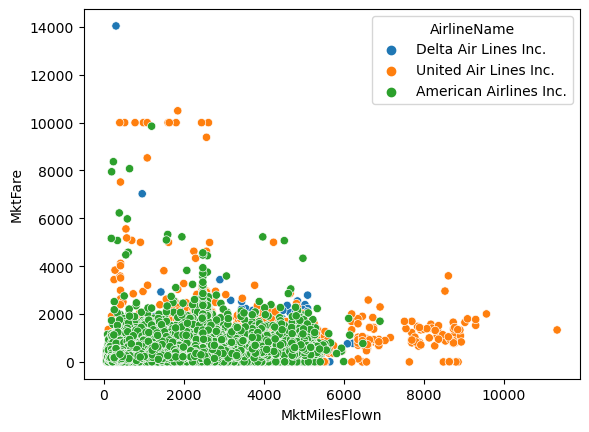

In [45]:
sns.scatterplot(data=df, x='MktMilesFlown', y='MktFare', hue='AirlineName')

Miles flown does not have a strong correlation with market fare, and it is evident that there are a large number of outliers in market fare that have low miles flown. 
United has most number of outliers in both miles flown and market fare


<Axes: >

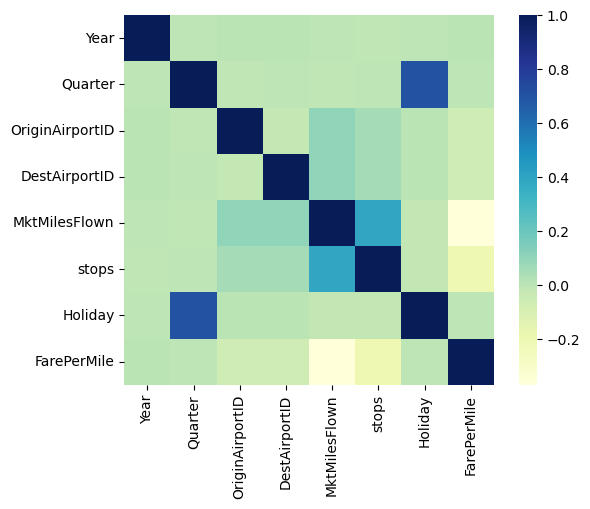

In [49]:
selected_cols = ['Year', 'Quarter', 'OriginAirportID', 'DestAirportID',  'MktMilesFlown','stops','Holiday', 'FarePerMile']
corr = df[selected_cols].corr()
sns.heatmap(corr, cmap="YlGnBu", square=True)

Fare Per mile has stronger correlation with Year, Quarter and Holiday, whereas Market miles flown has the weakest correlation.